FileUpload(value={}, description='Upload')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.912e+08, tolerance: 1.081e+08
  model = cd_fast.enet_coordinate_descent(



RMSE for Regression Models:
Linear Regression:
Train RMSE: 278.53125674371387
Test RMSE: 264.8591679825205

Polynomial Regression (degree=2):
Train RMSE: 384.08758850204214
Test RMSE: 415.32191154327455

ElasticNet:
Train RMSE: 441.365814562673
Test RMSE: 446.4429922434832


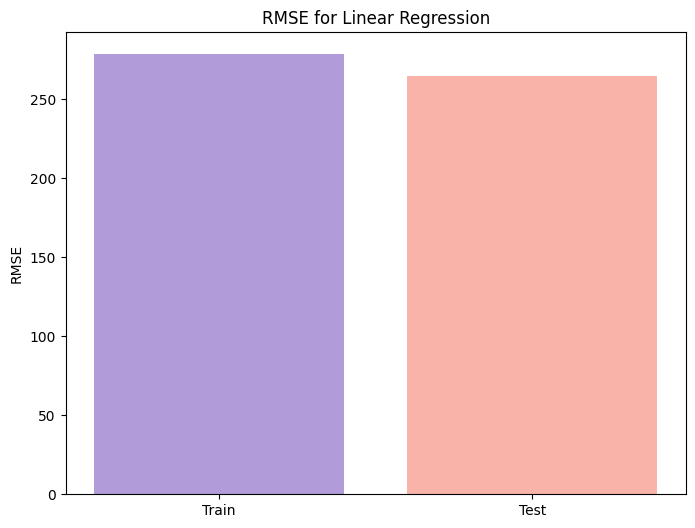

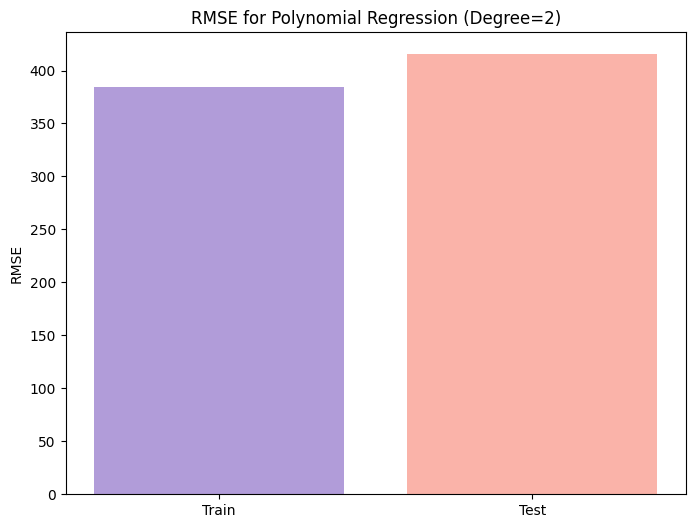

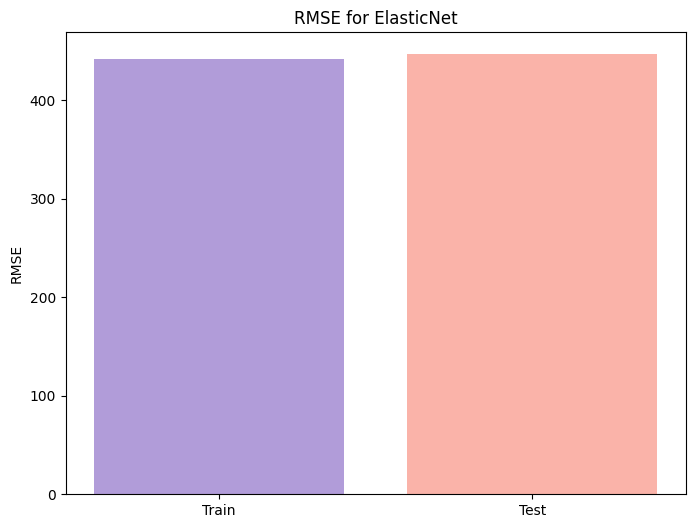

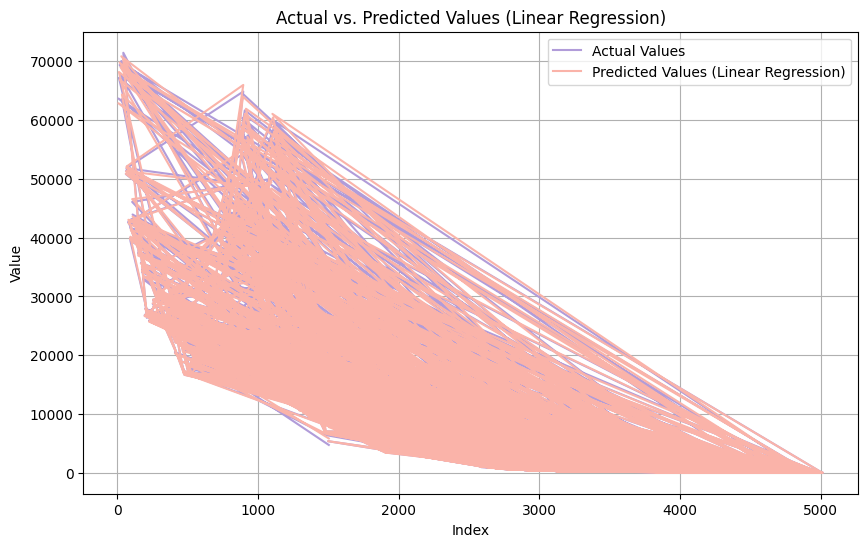

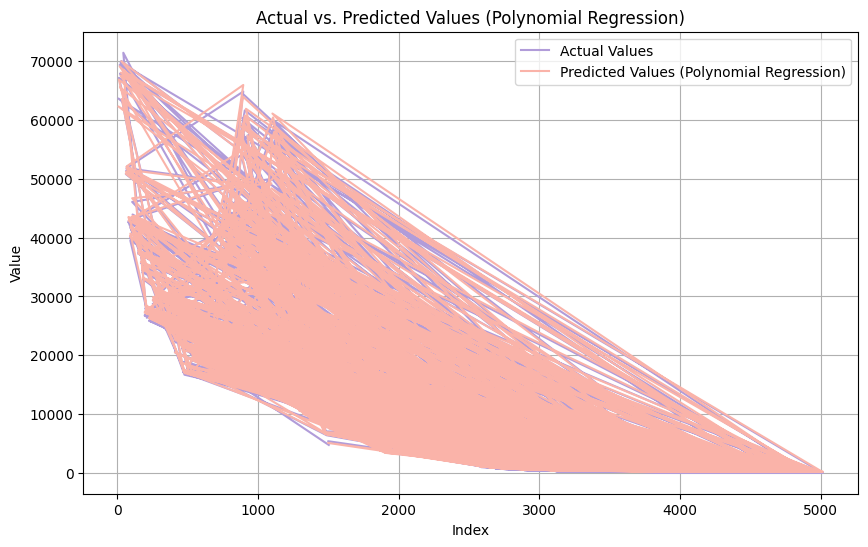

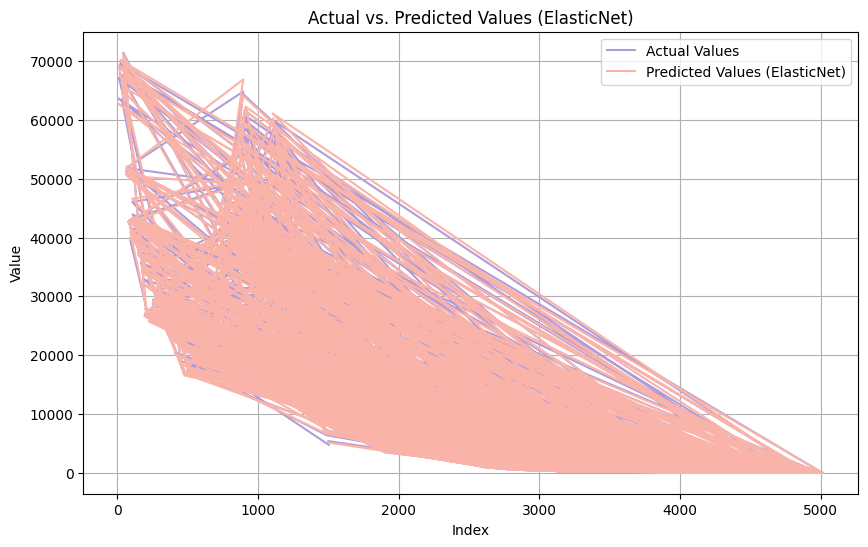

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import FileUpload
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from math import sqrt
import io

# Create a FileUpload widget
upload_widget = FileUpload()

# Display the FileUpload widget
display(upload_widget)

# Define a function to calculate RMSE
def calculate_rmse(model, X_train, y_train, X_test, y_test):
    train_rmse = sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = sqrt(mean_squared_error(y_test, model.predict(X_test)))
    return train_rmse, test_rmse

# Define a function to handle file upload
def handle_upload(change):
    uploaded_filename = next(iter(upload_widget.value))
    uploaded_file = upload_widget.value[uploaded_filename]['content']

    # Decode the uploaded file content and create a DataFrame
    df = pd.read_csv(io.BytesIO(uploaded_file))

    # Drop non-numeric columns and rows with missing values
    df.drop(["Start", "End"], axis=1, inplace=True)
    df.dropna(inplace=True)

    # Split the dataset into features and target
    X = df.drop("Close", axis=1)
    y = df["Close"]

    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    train_rmse_linear, test_rmse_linear = calculate_rmse(linear_reg, X_train, y_train, X_test, y_test)

    # Train and evaluate Polynomial Regression (degree=2)
    poly_reg = PolynomialFeatures(degree=2)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.transform(X_test)
    linear_reg_poly = LinearRegression()
    linear_reg_poly.fit(X_train_poly, y_train)
    train_rmse_poly, test_rmse_poly = calculate_rmse(linear_reg_poly, X_train_poly, y_train, X_test_poly, y_test)

    # Train and evaluate ElasticNet
    elastic_net = ElasticNet()
    elastic_net.fit(X_train, y_train)
    train_rmse_en, test_rmse_en = calculate_rmse(elastic_net, X_train, y_train, X_test, y_test)

    # Print RMSE for all models
    print("\nRMSE for Regression Models:")
    print("Linear Regression:")
    print("Train RMSE:", train_rmse_linear)
    print("Test RMSE:", test_rmse_linear)
    print("\nPolynomial Regression (degree=2):")
    print("Train RMSE:", train_rmse_poly)
    print("Test RMSE:", test_rmse_poly)
    print("\nElasticNet:")
    print("Train RMSE:", train_rmse_en)
    print("Test RMSE:", test_rmse_en)

    # Plotting the bar chart for Linear Regression
    plt.figure(figsize=(8, 6))
    plt.bar(['Train', 'Test'], [train_rmse_linear, test_rmse_linear], color=['#B19CD9', '#FAB3A9'])
    plt.title('RMSE for Linear Regression')
    plt.ylabel('RMSE')
    plt.show()

    # Plotting the bar chart for Polynomial Regression
    plt.figure(figsize=(8, 6))
    plt.bar(['Train', 'Test'], [train_rmse_poly, test_rmse_poly], color=['#B19CD9', '#FAB3A9'])
    plt.title('RMSE for Polynomial Regression (Degree=2)')
    plt.ylabel('RMSE')
    plt.show()

    # Plotting the bar chart for ElasticNet
    plt.figure(figsize=(8, 6))
    plt.bar(['Train', 'Test'], [train_rmse_en, test_rmse_en], color=['#B19CD9', '#FAB3A9'])
    plt.title('RMSE for ElasticNet')
    plt.ylabel('RMSE')
    plt.show()

    # Plotting the line chart for Linear Regression
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test.values, label='Actual Values', color='#B19CD9')
    plt.plot(y_test.index, linear_reg.predict(X_test), label='Predicted Values (Linear Regression)', color='#FAB3A9')
    plt.title('Actual vs. Predicted Values (Linear Regression)')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting the line chart for Polynomial Regression
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test.values, label='Actual Values', color='#B19CD9')
    plt.plot(y_test.index, linear_reg_poly.predict(X_test_poly), label='Predicted Values (Polynomial Regression)', color='#FAB3A9')
    plt.title('Actual vs. Predicted Values (Polynomial Regression)')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting the line chart for ElasticNet
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test.values, label='Actual Values', color='#B19CD9')
    plt.plot(y_test.index, elastic_net.predict(X_test), label='Predicted Values (ElasticNet)', color='#FAB3A9')
    plt.title('Actual vs. Predicted Values (ElasticNet)')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Register the function to handle file upload
upload_widget.observe(handle_upload, names='_counter')



In [ ]:
!pip install mplfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.0 MB/s eta 0:00:00
